## Forecasting EV Charging Demand in Palo Alto (USA), Dundee (UK) and Perth (AUS) - Conclusions

## Table of Contents
* [1. Introduction](#chapter1)
* [2. Palo Alto Forecasting Comparison](#chapter2)
* [3. Perth Forecasting Comparison](#chapter3)
* [4. Dundee Forecasting Comparison](#chapter4)
* [5. Transfer Learning Experiment](#chapter5)
* [6. Conclusion](#chapter6)

<a name="chapter1"></a>
## 1. Introduction

This notebook aims at summarizing the performance of different models applied during the project. Models have been trained in their respective notebooks and the predictions have been loaded here for comparison. Eventhough the team tried to implement an ARIMA model(it is usually a "go to" model for time series analysis), due to incomplete results and trouble with the actual implementation, it has been decided to include it in the compariason. The model is still present in the github repository in case the implementation results are of interest for the reader.

On that note, a developed random forest and a lstm model, were devloped for different estimation time frames:{daily, weekly and monthly} and different cities: {Palo Alto, Dundee, Perth} and the results in form of RSME are compared in the following sections. Moreover, a set of plots is included for each time frame and each city modeled by the lstm algorithm.  For clarity, only a few charging stations will be displayed for each city and time frame, as they will serve as good references for making comments and infering conclusions from the work. Thse are shown only for the lstm model, which performed better on a consistent manner across cities and time frames. Again, representing only for lstm will help maintaining clarity and cleannes trought the notebook.

**Why LSTM and RF?**

We believed these two models were very solid choices for working with our data on a time series context:  

RF models are inherently good at modeling non-linear relationships and interactions between variables. If the energy demand at certain stations is influenced by complex interactions of factors (like time of day coupled with specific events), RF might capture these better.
Temporal Dynamics: LSTM models are designed to handle temporal sequences and can capture long-term dependencies. Stations with demand patterns influenced by past trends or where historical context is important (like cumulative usage effects) might be better predicted by LSTM.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import pickle
import os

<a name="chapter2"></a>
## 2. Palo Alto Forecasting comparison

The few following command are used to load the results of lstm and rf models, stored in picke files.

In [3]:
# Directory containing the pickle files
directory = 'predictions/lstm'

# List all pickle files in the directory
pickle_files = [file for file in os.listdir(directory) if file.endswith('.pkl')]

# Dictionary to store loaded data
loaded_data = {}

# Load data from each pickle file
for file in pickle_files:
    file_path = os.path.join(directory, file)
    with open(file_path, 'rb') as f:
        loaded_data[file] = pickle.load(f)

lstm_dict = {'palo_alto':{}, 'perth':{}, 'dundee':{}}

lstm_dict['palo_alto']['daily'] = loaded_data['daily_predictions_palo_alto.pkl']
lstm_dict['palo_alto']['weekly'] = loaded_data['weekly_predictions_palo_alto.pkl']
lstm_dict['palo_alto']['monthly'] = loaded_data['monthly_predictions_palo_alto.pkl']
lstm_dict['perth']['daily'] = loaded_data['daily_predictions_perth.pkl']
lstm_dict['perth']['weekly'] = loaded_data['weekly_predictions_perth.pkl']
lstm_dict['perth']['monthly'] = loaded_data['monthly_predictions_perth.pkl']
lstm_dict['dundee']['daily'] = loaded_data['daily_predictions_dundee.pkl']
lstm_dict['dundee']['weekly'] = loaded_data['weekly_predictions_dundee.pkl']

In [4]:
def convert_to_dataframes(data, timeframes):
    # Initialize a dictionary to store RMSE values
    rmse_data = {tf: {} for tf in timeframes}

    # Iterate over timeframes
    for timeframe in timeframes:
        for station, df in data[timeframe].items():
            rmse_data[timeframe][station] = df['rmse']

    # Create DataFrame from the dictionary
    output_df = pd.DataFrame(rmse_data)

    return output_df

In [5]:
palo_alto_rmse = convert_to_dataframes(lstm_dict['palo_alto'], timeframes = ['daily', 'weekly', 'monthly'])
perth_rmse = convert_to_dataframes(lstm_dict['perth'], timeframes = ['daily', 'weekly', 'monthly'])
dundee_rmse = convert_to_dataframes(lstm_dict['dundee'], timeframes = ['daily', 'weekly'])

In [6]:
# Directory containing the pickle files
directory = 'predictions/pickles_rf'

# List all pickle files in the directory
pickle_files = [file for file in os.listdir(directory) if file.endswith('.pkl')]

# Dictionary to store loaded data
loaded_data = {}

# Load data from each pickle file
for file in pickle_files:
    file_path = os.path.join(directory, file)
    with open(file_path, 'rb') as f:
        loaded_data[file] = pickle.load(f)

rf_dict = {'palo_alto':{}, 'perth':{}, 'dundee':{}}

rf_dict['palo_alto']['daily'] = loaded_data['daily_predictions_palo_alto_rf.pkl']
rf_dict['palo_alto']['weekly'] = loaded_data['weekly_predictions_palo_alto_rf.pkl']
rf_dict['palo_alto']['monthly'] = loaded_data['monthly_predictions_palo_alto_rf.pkl']
rf_dict['perth']['daily'] = loaded_data['daily_predictions_perth_rf.pkl']
rf_dict['perth']['weekly'] = loaded_data['weekly_predictions_perth_rf.pkl']
rf_dict['perth']['monthly'] = loaded_data['monthly_predictions_perth_rf.pkl']
rf_dict['dundee']['daily'] = loaded_data['daily_predictions_dundee_rf.pkl']
rf_dict['dundee']['weekly'] = loaded_data['weekly_predictions_dundee_rf.pkl']
rf_dict['dundee']['monthly'] = loaded_data['monthly_predictions_dundee_rf.pkl']

In [7]:
palo_altoRF_rmse = convert_to_dataframes(rf_dict['palo_alto'], timeframes = ['daily', 'weekly', 'monthly'])
perthRF_rmse = convert_to_dataframes(rf_dict['perth'], timeframes = ['daily', 'weekly', 'monthly'])
dundeeRF_rmse = convert_to_dataframes(rf_dict['dundee'], timeframes = ['daily', 'weekly', 'monthly'])

In [8]:
from IPython.display import display

# Display each DataFrame with a title printed before it
print("Palo Alto LSTM RMSE:")
display(palo_alto_rmse)

Palo Alto LSTM RMSE:


,daily,weekly,monthly
HAMILTON,34.613259,78.798362,954.231872
HIGH,35.409880,124.360095,219.793860
BRYANT,38.885084,130.419499,281.181486
MPL,23.241876,92.358648,207.135670
RINCONADA LIB,40.445205,158.139299,924.629205
WEBSTER,40.987519,142.572267,1398.686060
TED THOMPSON,28.287412,114.207730,213.074893
CAMBRIDGE,45.476347,209.172979,654.103174


In [9]:
# Display each DataFrame with a title printed before it
print("Palo Alto RF RMSE:")
display(palo_altoRF_rmse)

Palo Alto RF RMSE:


,daily,weekly,monthly
PALO ALTO CA / HAMILTON,32.462227,99.145813,229.592006
PALO ALTO CA / HIGH,36.169416,162.193401,502.130547
PALO ALTO CA / BRYANT,33.903141,134.504175,332.072650
PALO ALTO CA / MPL,34.537735,159.330230,582.490457
RINCONADA LIB,39.530152,126.416965,761.391758
PALO ALTO CA / WEBSTER,43.404334,194.763595,1101.094089
PALO ALTO CA / TED THOMPSON,31.041727,81.998709,299.719056
PALO ALTO CA / CAMBRIDGE,55.943619,152.845412,590.024869


The tables above summarizes the RMSE errors of different models:

- The **LSTM** model seems to be **more consistent** across different stations than the RF model, with less variation between the best and worst RMSE values, especially on a daily and weekly basis.
- The **RF model** tends to **performs better** than the LSTM on a **daily basi** for most stations but shows higher variability and higher errors in monthly predictions. This could indicate that the RF model captures short-term variations better while struggling with long-term dependencies or trends that the LSTM might be capturing.
- Both models show relatively **poor performance** at **Webster** station across all time windows. External factors or data quality issues might be affecting predictions at this location.

Both the LSTM and RF models have their strengths, with the LSTM model providing more consistent performance across different time scales and the RF model excelling in daily predictions at certain stations. However, there's a need for improvements, particularly in monthly forecasting and at specific stations like Webster, to enhance reliability for long-term strategic planning and decision-making in the real world.

**A set of plot showing the results for a slection of stations estimated with the lstm model is hown below:**

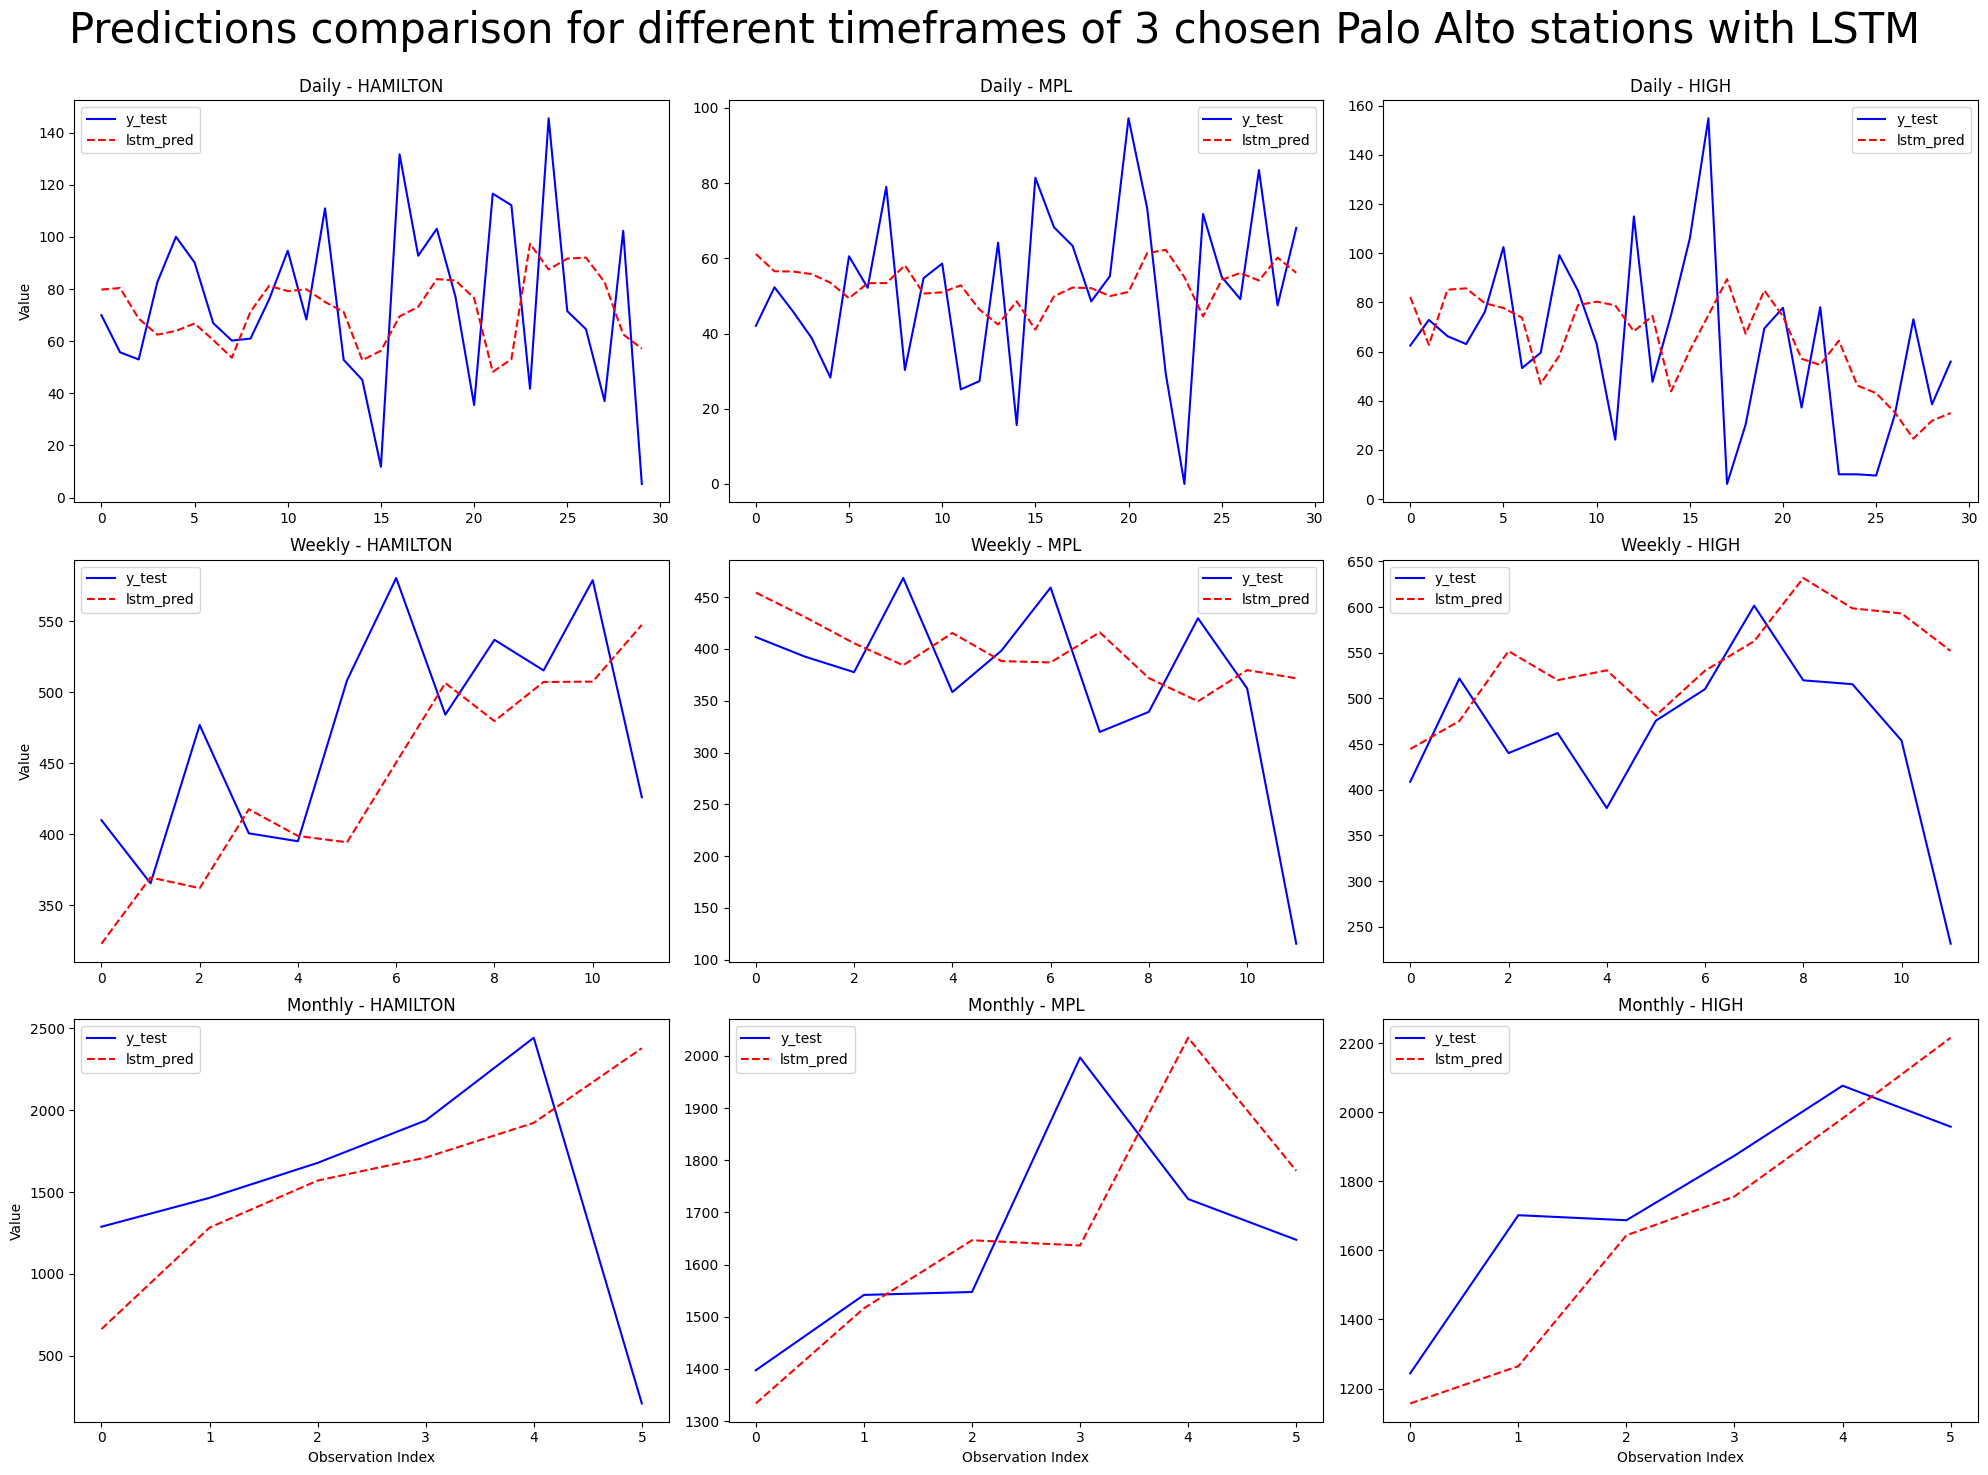

In [10]:
stations_to_compare = ['HAMILTON', 'MPL', 'HIGH']
timeframes = ['daily', 'weekly', 'monthly']

# Create subplots
fig, axs = plt.subplots(len(timeframes), len(stations_to_compare), figsize=(20, 15))

# Iterate over timeframes
for i, timeframe in enumerate(timeframes):
    # Iterate over stations
    for j, station in enumerate(stations_to_compare):
        # Get data for the station and timeframe
        data = lstm_dict['palo_alto'][timeframe][station]
        y_test = data['y_test']
        y_pred = data['y_pred']
        
        # Plot y_test and y_pred
        ax = axs[i, j]
        ax.plot(y_test, label='y_test', color='blue')
        ax.plot(y_pred, label='lstm_pred', color='red', linestyle='--')
        ax.set_title(f'{timeframe.capitalize()} - {station}')
        ax.legend()

# Add common x and y labels
for ax in axs[-1, :]:
    ax.set_xlabel('Observation Index')
for ax in axs[:, 0]:
    ax.set_ylabel('Value')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.suptitle('Predictions comparison for different timeframes of 3 chosen Palo Alto stations with LSTM', fontsize=30)
plt.show()

Three chosen stations were picked to ilustrate the predictions. It can be seen that the lstm predictions reflect the data well and can definately can **serve companies at preparing strategies for the future** operations. Sometimes the model fails to predict the sudden spikes or drops but given the nature of the task this is understandable. We can ifere that the LSTM model, but also the RF(from the tables shown before) **perfrom best in the abscence of sudden rises and falls in demans**. Perhaps more data and about charging events could   

I terms of **daily predictions**, the model does a **better job** in **capturing** the general **pattern** of the data **than** in a **weekly or monthly** scale. On these last two instances the model also captures the overall trend of the energy demand, but sometimes **misses** the actual **magnitude** of it. This could be the result of **comulative daily errors**.    

Another point, worth commenting is the general tendency of the model to **underestimate energy demand**, specially when facing sudden peaks in the data. These should be taken into account by a comapny when using the model to make estimations on its fleet of ev chargers.  

<a name="chapter3"></a>
## 3. Perth Forecasting Comparison

In [11]:
print("Perth LSTM RMSE:")
perth_rmse

Perth LSTM RMSE:


,daily,weekly,monthly
Broxden Park & Ride,86.021137,374.000024,2275.774122
"Crown Inn Wynd Car Park, Auchterarder",20.335401,111.681404,587.457244
South Inch Car Park,31.845223,169.409391,1285.853906
Kinross Park and Ride,57.785253,516.756761,3046.900845
"Leslie Street Car Park, Blairgowrie",27.392241,90.367087,785.228683
Canal Street Car Park,12.767522,78.423668,466.574020
King Street Car Park,29.195588,171.547849,963.304624
"Moness Terrace Car Park, Aberfeldy",40.696992,138.554285,715.789189
"Atholl Street Car Park, Dunkeld",21.500072,138.536398,452.580736
"Rie-Achan Road Car Park, Pitlochry",40.171102,161.477018,1105.304474


In [12]:
print("Perth RF RMSE:")
display(perthRF_rmse)

Perth RF RMSE:


,daily,weekly,monthly
Broxden Park & Ride,45.665020,13.062228,1111.604896
"Crown Inn Wynd Car Park, Auchterarder",26.777186,157.487478,195.566469
South Inch Car Park,20.864462,82.428627,618.097964
Kinross Park and Ride,37.893931,90.263472,1231.662183
"Leslie Street Car Park, Blairgowrie",15.933500,131.531430,368.422539
Canal Street Car Park,10.429817,62.896766,182.746069
King Street Car Park,37.033024,53.848044,921.185917
"Moness Terrace Car Park, Aberfeldy",24.082784,153.777558,371.093618
"Atholl Street Car Park, Dunkeld",0.000000,59.291765,118.655200
"Rie-Achan Road Car Park, Pitlochry",32.752953,32.074004,709.597289


On a daily timescale, generally, the RF model outperforms the LSTM model on a daily basis, with significantly lower RMSE values across most stations. The RF model continues to demonstrate lower RMSE values on a weekly scale at most locations, demonstrating its robustness for short-term predicitons. On a monthly scale, the RF still performs well but is not a clear winner acros the booard.  



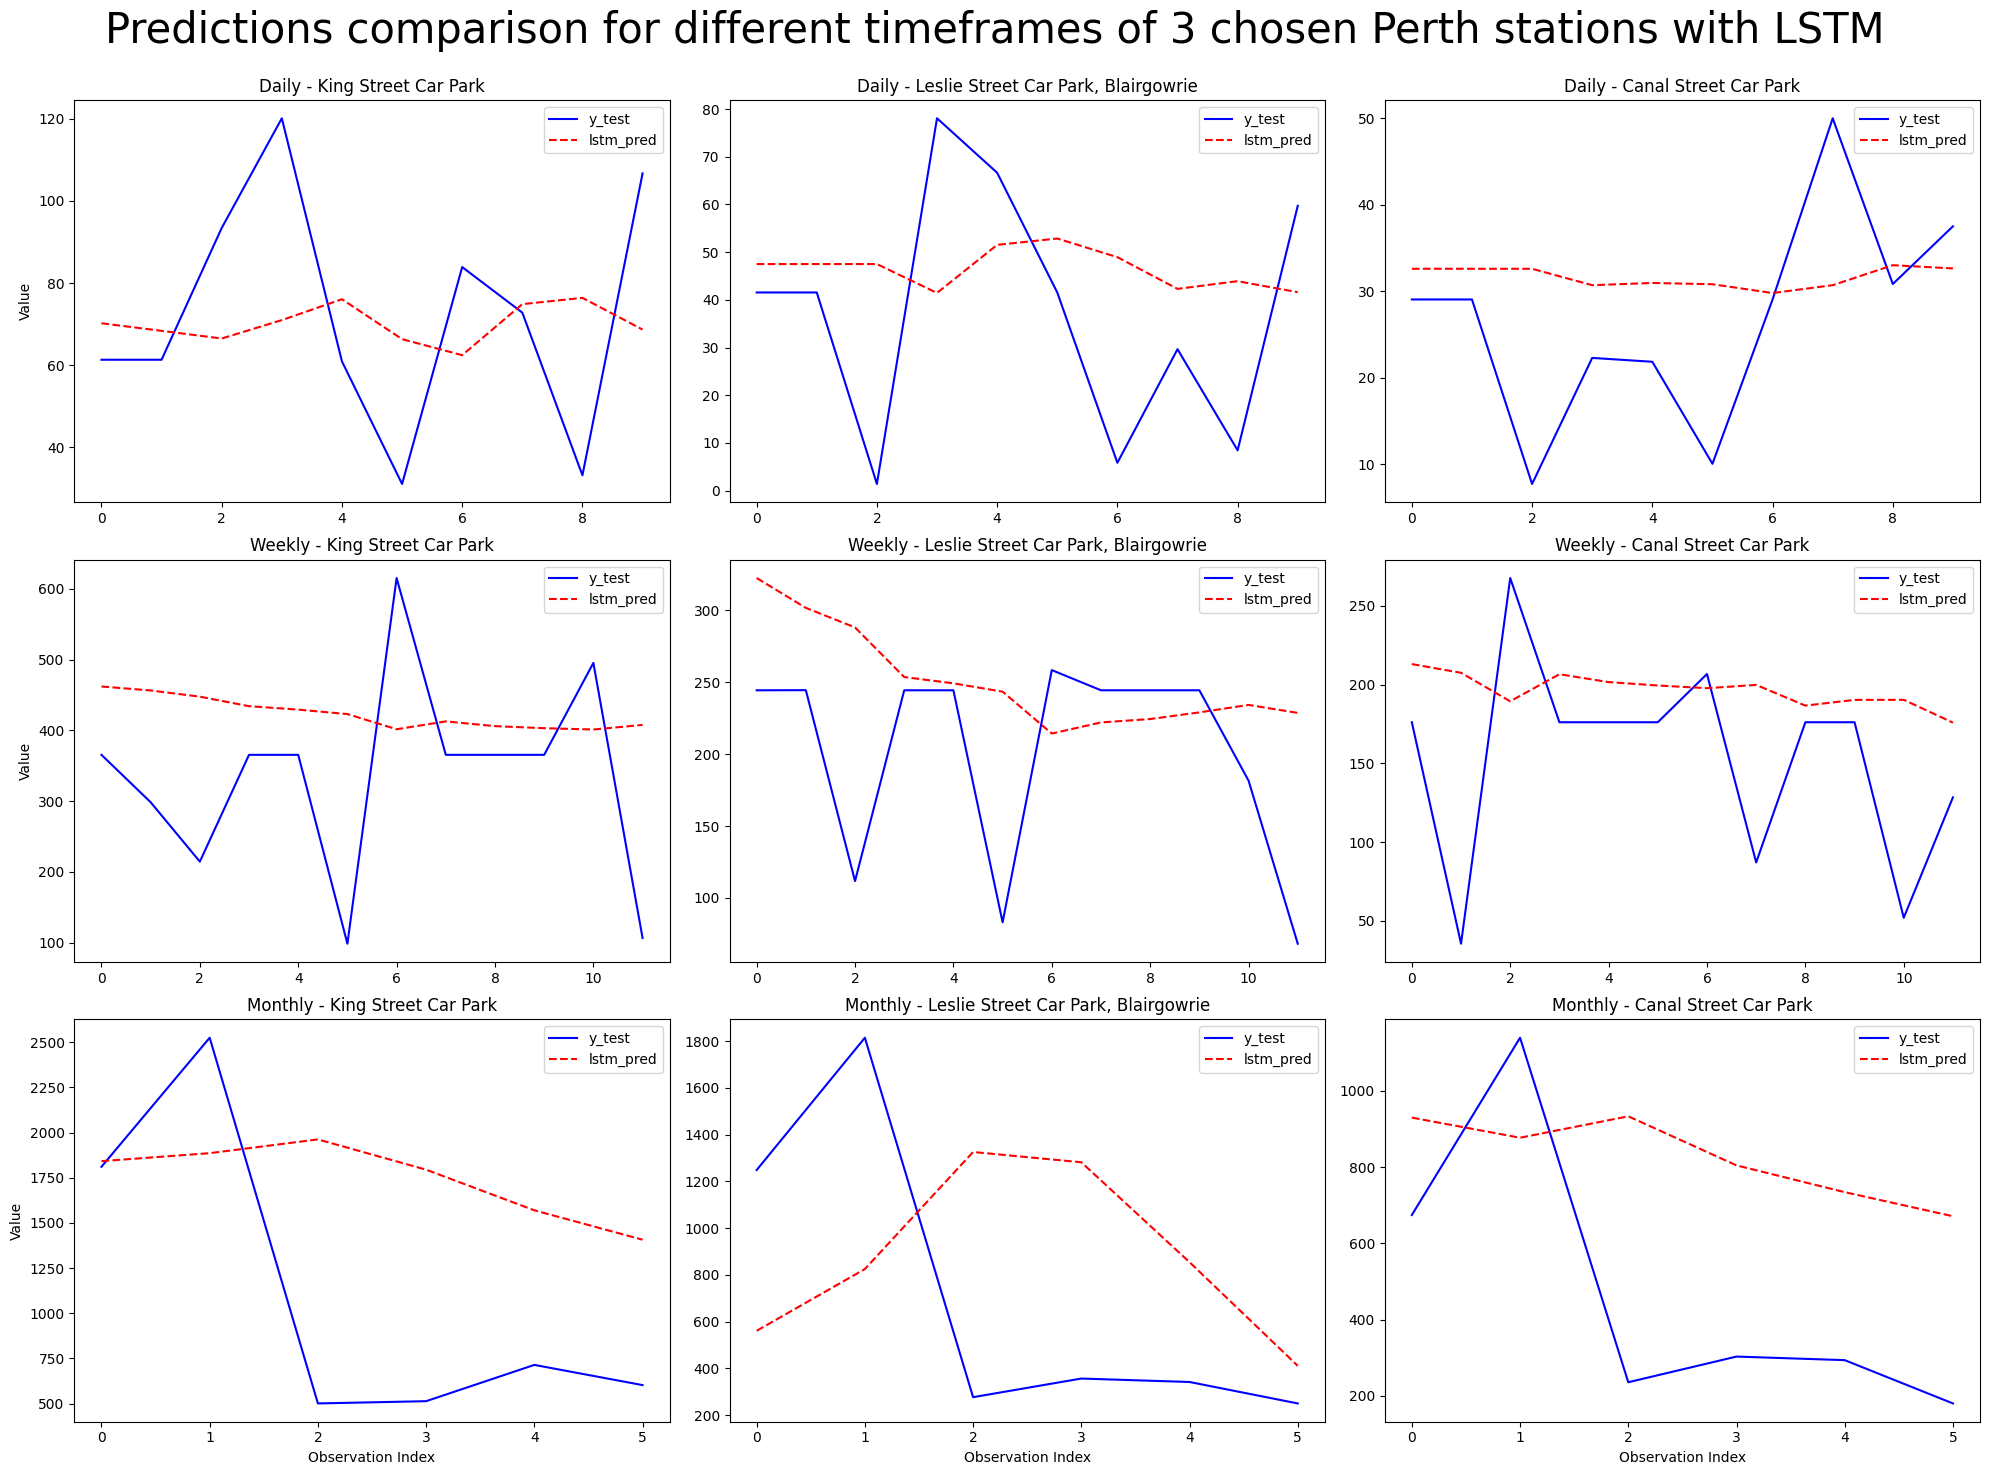

In [13]:
# Define stations and timeframes
stations_to_compare = ['King Street Car Park', 'Leslie Street Car Park, Blairgowrie', 'Canal Street Car Park']
timeframes = ['daily', 'weekly', 'monthly']

# Create subplots
fig, axs = plt.subplots(len(timeframes), len(stations_to_compare), figsize=(20, 15))

# Iterate over timeframes
for i, timeframe in enumerate(timeframes):
    # Iterate over stations
    for j, station in enumerate(stations_to_compare):
        # Get data for the station and timeframe
        data = lstm_dict['perth'][timeframe][station]
        y_test = data['y_test']
        y_pred = data['y_pred']
        
        # Plot y_test and y_pred
        ax = axs[i, j]
        ax.plot(y_test, label='y_test', color='blue')
        ax.plot(y_pred, label='lstm_pred', color='red', linestyle='--')
        ax.set_title(f'{timeframe.capitalize()} - {station}')
        ax.legend()

# Add common x and y labels
for ax in axs[-1, :]:
    ax.set_xlabel('Observation Index')
for ax in axs[:, 0]:
    ax.set_ylabel('Value')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.suptitle('Predictions comparison for different timeframes of 3 chosen Perth stations with LSTM', fontsize=30)
plt.show()

The LSTM model performs relatively well on daily and weekly predictions but struggles with monthly predictions across all stations. This means that while the model can handle short to medium-term dependencies, it might not capture longer-term trends effectively.

The consistent underestimation of peaks across different time windows might indicate that the model is either underfitting (not complex enough to capture variability) or that it lacks sufficient or representative training data to learn from higher demand scenarios.

<a name="chapter4"></a>
## 4. Dundee Forecasting comparison

In [14]:
print("Dundee LSTM RMSE:")
dundee_rmse

Dundee LSTM RMSE:


,daily,weekly
"Lochee Charging Hub, Dundee",164.998588,1410.159664
"Greenmarket Multi Car Park, Dundee",40.687344,255.577904
"Queen Street Car Park, Broughty Ferry, Dundee",49.338745,133.236015
"Housing Office West, Dundee",9.316362,23.166639
"Nethergate, Dundee",12.030164,32.899215
"Brington Place Sheltered Housing, Dundee",4.788280,22.368145
"Balunie Drive, Dundee",9.429919,27.082165
"Social Work Building, Jack Martin Way, Dundee",7.622284,16.362198
"Dundee Ice Arena, Dundee",36.751471,303.615533
"Mitchell Street, Dundee",4.793077,9.950468


In [15]:
print("Dundee RF RMSE:")
display(dundeeRF_rmse)

Dundee RF RMSE:


,daily,weekly,monthly
"Lochee Charging Hub, Dundee",125.730723,NaN,NaN
"Greenmarket Multi Car Park, Dundee",42.196288,142.540693,2335.271804
"Queen Street Car Park, Broughty Ferry, Dundee",49.323560,242.218598,2399.110665
"Housing Office West, Dundee",9.541614,39.491754,167.842036
"Nethergate, Dundee",12.174629,48.258827,257.656598
"Brington Place Sheltered Housing, Dundee",4.305888,14.145410,200.188458
"Balunie Drive, Dundee",12.544495,17.893722,124.002743
"Social Work Building, Jack Martin Way, Dundee",7.497889,45.997858,274.641271
"Dundee Ice Arena, Dundee",51.615023,262.900250,1469.947223
"Mitchell Street, Dundee",5.743684,10.400482,66.724793


The results for daily, wwekly and monthly predictions vary significantly . This could be explained by the fact that the models perform well in areas with stable demand while struggle in high variable or unpredictable usage patterns. Nevertheless the main issue behind the variation in results is the data. The city of perth has significant gaps in data which hurt the predictions. This factor and the obtained results highilight the importance of ensuring high quality data and good data pre-processing.

RF performs generally better for short-term predictions although underperforms long-term copared to LSTM.

Nevertheless, the results apear acceptable and even very good for some selected locations.

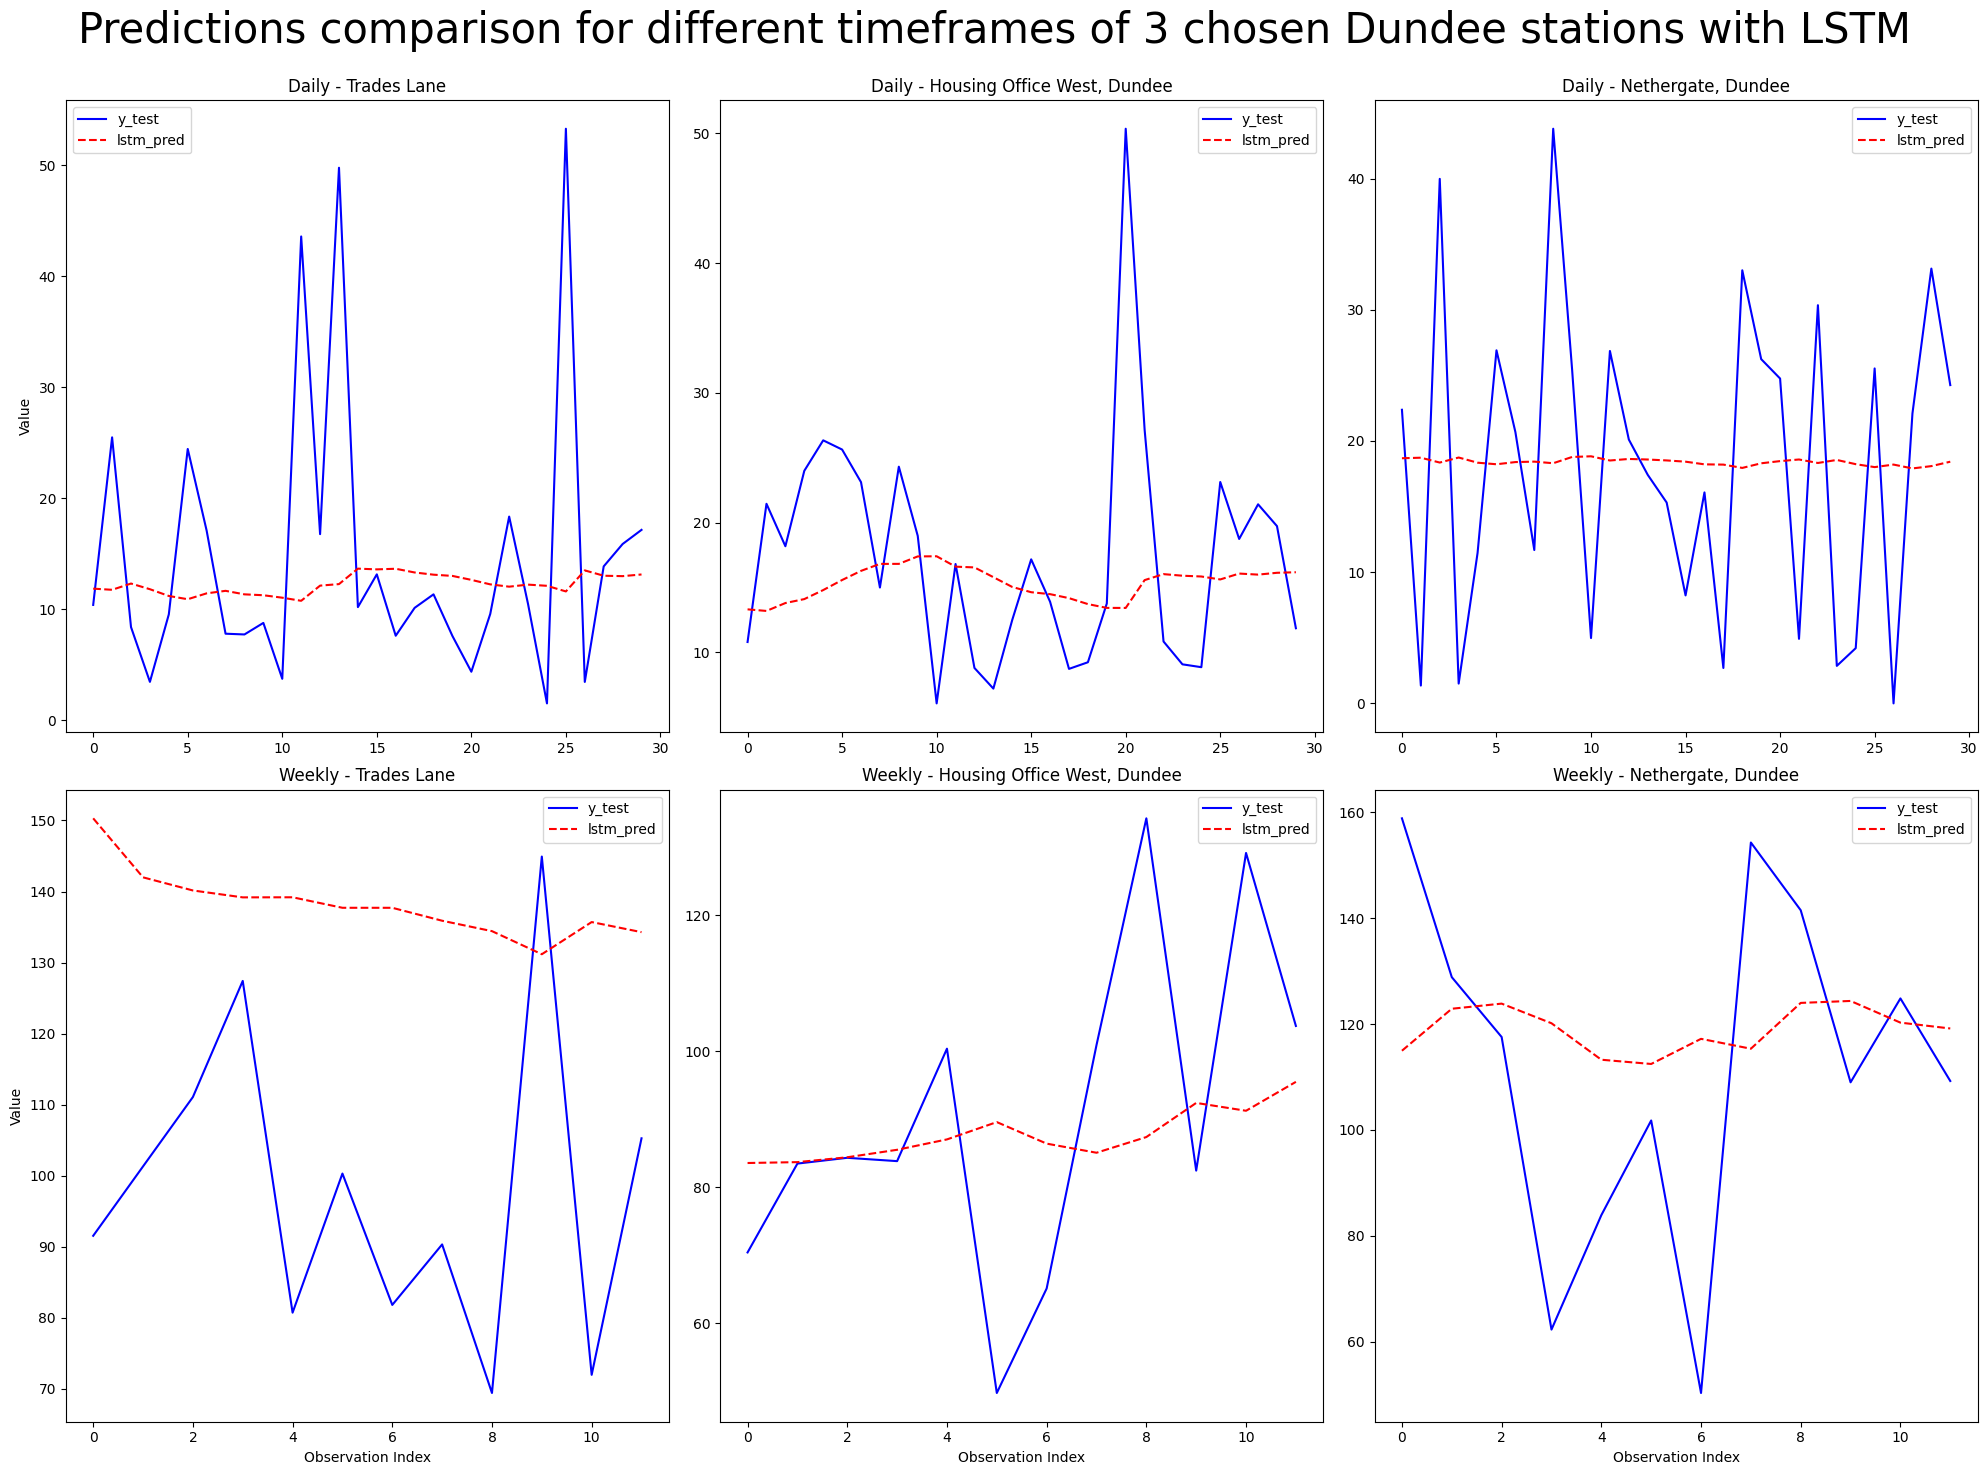

In [16]:
# Define stations and timeframes
stations_to_compare = ['Trades Lane', 'Housing Office West, Dundee', 'Nethergate, Dundee']
timeframes = ['daily', 'weekly']

# Create subplots
fig, axs = plt.subplots(len(timeframes), len(stations_to_compare), figsize=(20, 15))

# Iterate over timeframes
for i, timeframe in enumerate(timeframes):
    # Iterate over stations
    for j, station in enumerate(stations_to_compare):
        # Get data for the station and timeframe
        data = lstm_dict['dundee'][timeframe][station]
        y_test = data['y_test']
        y_pred = data['y_pred']
        
        # Plot y_test and y_pred
        ax = axs[i, j]
        ax.plot(y_test, label='y_test', color='blue')
        ax.plot(y_pred, label='lstm_pred', color='red', linestyle='--')
        ax.set_title(f'{timeframe.capitalize()} - {station}')
        ax.legend()

# Add common x and y labels
for ax in axs[-1, :]:
    ax.set_xlabel('Observation Index')
for ax in axs[:, 0]:
    ax.set_ylabel('Value')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.suptitle('Predictions comparison for different timeframes of 3 chosen Dundee stations with LSTM', fontsize=30)
plt.show()

When looking deeper into predictions the story changes. Above the predicted values for several last weekly and monthly observations were plotted. Clearly predictions are bad. They do not account for any variability and are simply flat, very often off the target. Following the pattern of other cities, the model fails to predict sudden rises or drops in demand and consistently understimates this demand.

<a name="chapter5"></a>
## 5. Transfer Learning Experiment

Datasets used for Perth and Dundee have data quality issues which impact the model performance. Perth has too many missing values while Dundee does not have sufficiently long timeframe. The issue of not having good enough data to train models is very common among any type of businesses. **Imagine that we have a company which is sucessfully running its business in Palo Alto for several years. The company trains a model forecasting the energy demand helping them plan and organize logistics connected to it. As the company grows it decides to expand its operations to a new location - Dundee. Unfortunately they have not operated long enough to be able to train model there. The solution to that could be a transfer learning apporach which utilizes model trained on data in Palo Alto to produce forecasts of energy demand in Dundee.**

Below you can see the **results** of experiment in which LSTM model trained to predict weekly energy demand for MPL station in Palo Alto was transfer learned to predict the demand for several stations in Dundee. The Palo Alto model was trained on 9 years as opposed to 9 months in case of Dundee.

![Image Title](plots/transfer_learning.png)

Predictions obtained from transfer learning were compared to the ones obtained from locally trained model. Clearly, the **predcitions are much better**. Not only do they give a much lower RMSE error but also they follow the pattern of the true observations (they are not simply flat predictions).  

**What does it imply for the business?**  


 Firstly the company does not have to wait several years to produce decent predictions of demand in a newly opened locations. This gives the upper hand in planning and alows for better preparations. Secondly if the company already has a sucessful model for different region in operation it can cut costs associated with developing the forecast model. Utilizing already sucessful model is much simplier, faster and can perform well as shown above. Of course a locally trained model is ideal but until suficcient data are gathered transfer learning can act as a valid substitute.

<a name="chapter6"></a>
## 6. Conclusions

The models we have developed seem to be performing well for Palo Alto but rather poor in case of Perth and Dundee. This issues is caused by different **data quality** among the cities. Perth suffers from missing data while Dundee's timeframe is too short. In light of that we resorted to experimenting with transfer learning approach in which a model trained for MPL Palo Alto station was utilized to predict the energy demand in Dundee. The results are very satisfactory as the transfer learning approach helped produced significantly better forecasts. This means that a business wanting to expand its operation to a new location can use the **transfer learning strategy** to produce valuable predictions until enough data are gathered to train the model locally. Additionally this apporach can cut costs of model development as transfer learning is much similier from technical perspective and does not require that much effort from engineers.  

The **RF model's superior performance on daily and weekly predictions** suggests it is more effective for short-term operational decisions, where immediate responsiveness to variability is crucial.  

**Choosing between LSTM and RF** for practical applications should consider specific needs: RF for robustness and handling variability effectively across shorter periods, and LSTM for potential benefits in understanding longer-term trends where ample and high-quality data is available.

While RF generally performs better, **LSTM might still be preferable in scenarios where understanding and predicting based on longer-term patterns is critical**, provided that the data supports this kind of analysis. This is a issue that must be tackled by the comapny if accurate long-term planning must be succesfull. A data acquisition system that is both reliable and rich(weather data, local events, seasonal variations) in terms of features can tremendously help the performace of the models. Moreover, a databse that is both feature rich and extensive(many cahrging events across years of operation) is a key- to sucess in this area.


